# HOMEWORK 3: K-MEANS
Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1:
Implement k-means algorithm by Numpy.

In [2]:
class MyKMeans:
    def __init__(self, n_clusters=3, max_iter=None, seed=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.X = None
        self.labels = None
        self.seed = seed
    
    def fit(self, X):
        self.X = np.array(X)
        self.labels, self.centroids = self._cluster()

    def fit_predict(self, X):
        self.fit(X)
        return self.labels

    def _cluster(self):
        centers = self._initialize()
        labels = np.zeros(self.X.shape[0])
        new_labels = np.zeros(self.X.shape[0])
        for iter in range(self.max_iter):
            for x in range(self.X.shape[0]):
                distance = np.array([self._distance(self.X[x] - c) for c in centers])
                new_labels[x] = np.argmin(distance)
            if np.array_equal(labels, new_labels):
                break
            else:
                labels = new_labels.copy()
                centers = np.array([np.mean(self.X[labels==c]) for c in np.arange(0, self.n_clusters, 1)])   
        return labels, centers
    
    def _initialize(self):
        np.random.seed(self.seed)
        indices = np.random.choice(self.X.shape[0], size=self.n_clusters, replace=False)
        return np.array([self.X[i] for i in indices])
    
    def predict(self, X):
        labels = []
        for x in X:
            distance = self._distance(X[x] - self.cluster_centers)
            labels.append(np.armin(distance))
        return np.array(labels)

    def _distance(self, X):
        return np.linalg.norm(X)

## Exercise 2

Use "Wine dataset" below and choose 2 features according to your preference. Run the k-means algorithm built in the first question. Try 3 different numbers of cluster and visualize the clustering result to see if there is any difference.

In [3]:
wine = pd.read_csv("../data/wine-clustering.csv")
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Choosing the first two features. Test for number of clusters equal to 2, 3, 4.

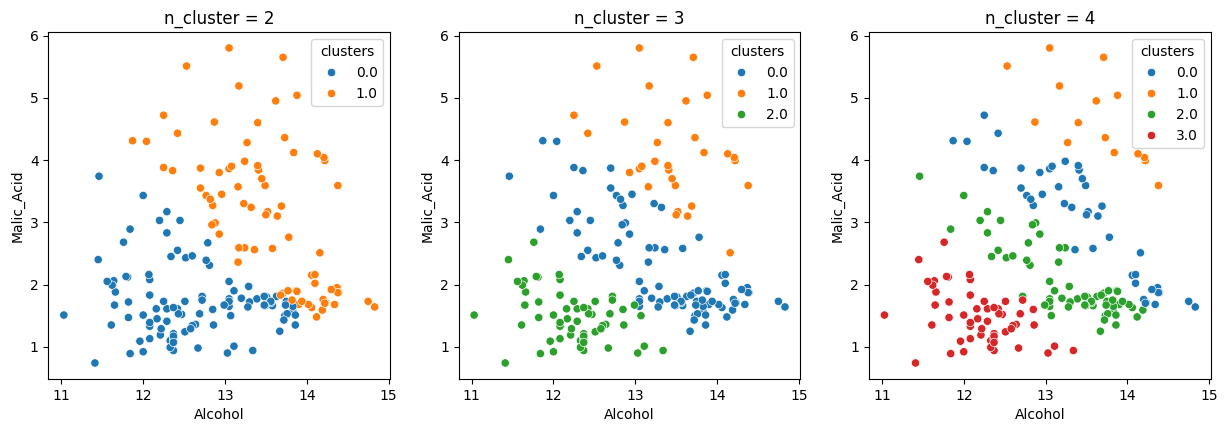

In [4]:
def kmeans_clustering_plot(X, n_clusters, title=None):
    kmeans = MyKMeans(n_clusters=n_clusters, max_iter=1000)
    y = kmeans.fit_predict(X)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette="tab10")
    plt.legend(title='clusters')
    if title is None:
        title = f'n_cluster = {n_clusters}'
    plt.title(title)

testing_clusters = [2, 3, 4]
plt.figure(figsize=(15, 4.5))
for i in range(len(testing_clusters)):
    plt.subplot(1, 3, i+1)
    kmeans_clustering_plot(wine.iloc[:, :2].copy(), n_clusters=testing_clusters[i])

## Exercise 3

Read and understand how to choose the optimal number of cluster [(Link)](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/). Draw the elbow for the whole "Wine" dataset (all features).

### 1. Elbow Curve Method

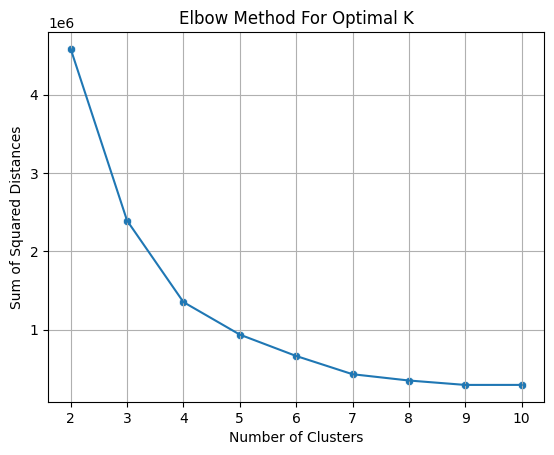

In [5]:
def calculate_inertia(X, y):
    centroids = [np.mean(X.iloc[y==c], axis=0) for c in np.unique(y)]
    inertia = np.sum([np.linalg.norm(X.iloc[c] - centroids[int(y[c])])**2 for c in range(X.shape[0])])
    return inertia

def elbow_chart_kmeans(X, n_clusters_range=np.arange(2, 11, 1)):
    inertia = []
    for k in n_clusters_range:
        X_copy = X.copy()
        kmeans = MyKMeans(n_clusters=k, max_iter=1000)
        y = kmeans.fit_predict(X_copy)
        inertia.append(calculate_inertia(X_copy, y))
    sns.lineplot(x=n_clusters_range, y=inertia)
    sns.scatterplot(x=n_clusters_range, y=inertia)
    plt.title("Elbow Method For Optimal K")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Distances")
    plt.grid(True)
    plt.show()

X = wine.copy()
elbow_chart_kmeans(X)

__Comments__
* Angle point or "Elbow" appears at k = 4

### 2. Silhouette Analysis
<br>
The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation)

* The value of the silhouette coefﬁcient is between [-1, 1].
* A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
* The worst value is -1. Values near 0 denote overlapping clusters.

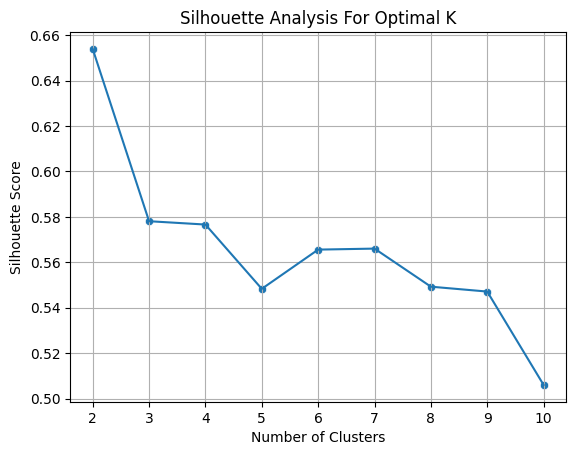

In [6]:
def calculate_silhouette(X, y):
    sils = []
    for i in range(X.shape[0]):
        label = int(y[i])
        a = np.mean(np.linalg.norm(X.iloc[i] - X.iloc[y==label], axis=1))
        distance_clusters = [np.linalg.norm(X.iloc[i] - X.iloc[y==c], axis=1) for c in np.unique(y) if c != label]
        b = np.min([np.mean(distance) for distance in distance_clusters])
        sils.append((b-a)/np.max([a, b]))
    return np.mean(sils)

def silhouette_chart(X, n_clusters_range=np.arange(2, 11, 1)):
    sil_scores = []
    for k in n_clusters_range:
        X_copy = X.copy()
        kmeans = MyKMeans(n_clusters=k, max_iter=1000, seed=42)
        y = kmeans.fit_predict(X_copy)
        sil_scores.append(calculate_silhouette(X_copy, y))
    sns.lineplot(x=n_clusters_range, y=sil_scores)
    sns.scatterplot(x=n_clusters_range, y=sil_scores)
    plt.title("Silhouette Analysis For Optimal K")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()

X = wine.copy()
silhouette_chart(X)

## Exercise 4

__Limitation of KMeans__

* The number of clusters is required to be defined beforehand
* Being dependent on the initialized centroids
* Sensitive to outliers
* Unable to handle data of vary size and density
* Unable to handle data of non-spherical shape

__Three examples that k-means does not work well__

In [7]:
def create_sample(subs):
    label = 0
    for i in range(len(subs)):
        subs[i] = pd.DataFrame(subs[i])
        subs[i]['lables'] = np.zeros(subs[i].shape[0], dtype=int) + label
        label += 1
    X = pd.concat(subs)
    return X

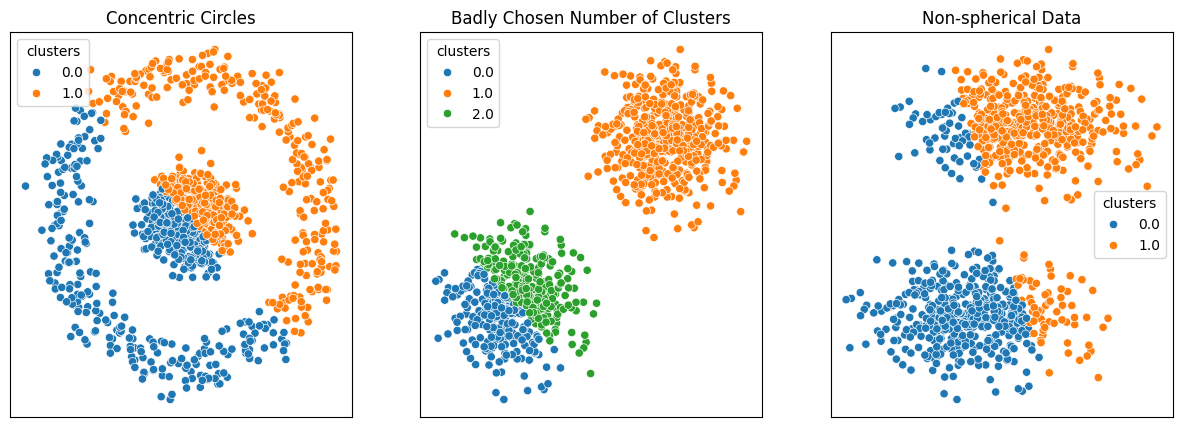

In [8]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# generate data (concentric circles)
X0, _ = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

# generate data (same in sizes and variances)
X1, _ = make_blobs(n_samples=500, cluster_std=1, random_state=0, centers=[[5, 5]])
X2, _ = make_blobs(n_samples=500, cluster_std=1, random_state=0, centers=[[0, 0]])

# generate data (non-spherical but elliptical data)
X3, _ = make_blobs(n_samples=500, cluster_std=[[5, 1]], random_state=0, centers=[[5, 7]])
X4, _ = make_blobs(n_samples=500, cluster_std=[[5, 1]], random_state=0, centers=[[0, 0]])

samples = [[X0],
           [X1, X2],
           [X3, X4]]
n_clusters = [2, 3, 2]
titles = ['Concentric Circles',
          'Badly Chosen Number of Clusters',
          'Non-spherical Data']

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    X = create_sample(samples[i])
    kmeans_clustering_plot(X, n_clusters=n_clusters[i], title=titles[i])
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(())
    plt.yticks(())

## Exercise 5

__KMeans++__
<br>
One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids. To overcome the above-mentioned drawback we use K-means++. How this algorithm works is almost the same as standard KMeans idea, except for the first steps, that is the initialization of the centroids. Standard KMeans algorithm randomly selects all initial k centroids, while KMeans++ randomly selects only the first one then it will calculate the distance between current centroid and all other points and choose the point with maximum distance as the next centroid, repeat those steps until all k centroids already selected.

In [9]:
class KMeansPlusPlus(MyKMeans):
    def __init__(self, n_clusters=3, max_iter=None, seed=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.X = None
        self.labels = None
        self.seed = seed
    
    def _initialize(self):
        np.random.seed(self.seed)
        indices = [np.random.randint(0, self.X.shape[0])]
        for k in range(self.n_clusters-1):
            distances = []
            centroid = self.X[indices[k]]
            for i in range(self.X.shape[0]):
                dist = np.linalg.norm(centroid-self.X[i])
                distances.append(dist)
            candidates = np.argsort(distances)
            new_centroid = -1
            while candidates[-1] in indices:
                new_centroid -= 1
            indices.append(candidates[new_centroid])
        return np.array([self.X[i] for i in indices])

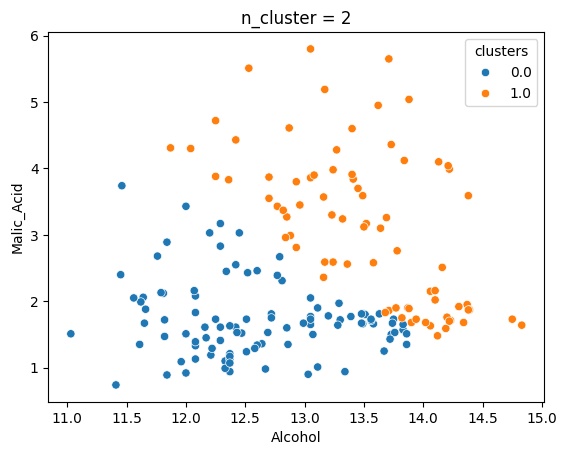

In [10]:
kmeans_clustering_plot(wine.iloc[:, :2], n_clusters=2)